https://www.ers.usda.gov/data-products/wheat-data/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',1000)

U.S. Acreage, Production, Yield, and Farm Price
Table 1--Wheat: planted acreage, harvested acreage, production, yield, and farm price


1 bushel wheat or soybean Bushels  =	=60lbs =27.216kg =0.0272metrictons

In [4]:
wheat_raw_df = pd.read_excel('Wheat Data-All Years_Dec2022.xlsx',sheet_name ='WheatYearbookTable01-Full',skiprows=1,skipfooter=11)
print(wheat_raw_df.shape)

(691, 7)


In [5]:
columns=['WheatType','MarketingYear','PlantedAcreage','HarvestedAcreage','Production','Yield','WAVFarmPrice']

In [6]:
wheat_raw_df.columns = columns

In [7]:
wheat_raw_df.head()

,WheatType,MarketingYear,PlantedAcreage,HarvestedAcreage,Production,Yield,WAVFarmPrice
0,NaN,NaN,million acres,million acres,million bushels,bushels per acre,dollars per bushel
1,All wheat,1866/67,--,15.408,169.703,11,2.06
2,All wheat,1867/68,--,16.738,210.878,12.6,2.01
3,All wheat,1868/69,--,19.14,246.272,12.9,1.46
4,All wheat,1869/70,--,21.194,289.526,13.7,0.923


In [8]:
units = {'PlantedAcreage':'million acres',
         'HarvestedAcreage':'million acres',
         'Production': 'million bushels',
         'Yield':'bushels per acre',
         'WAVFarmPrice':'dollars per bushel'
        }

In [9]:
wheat_raw_df = wheat_raw_df.drop(index=0,axis=0)

In [10]:
wheat_raw_df.head()

,WheatType,MarketingYear,PlantedAcreage,HarvestedAcreage,Production,Yield,WAVFarmPrice
1,All wheat,1866/67,--,15.408,169.703,11,2.06
2,All wheat,1867/68,--,16.738,210.878,12.6,2.01
3,All wheat,1868/69,--,19.14,246.272,12.9,1.46
4,All wheat,1869/70,--,21.194,289.526,13.7,0.923
5,All wheat,1870/71,--,20.945,254.429,12.1,1.04


In [11]:
wheat_raw_df.tail()

,WheatType,MarketingYear,PlantedAcreage,HarvestedAcreage,Production,Yield,WAVFarmPrice
686,Durum,2018/19,2.073,1.974,77.985,39.5,5.33
687,Durum,2019/20,1.341,1.177,53.959,45.8,4.9
688,Durum,2020/21,1.69,1.665,69.141,41.5,6.02
689,Durum,2021/22,1.642,1.526,37.649,24.7,12.1
690,Durum,2022/23,1.632,1.581,63.981,40.5,--


In [12]:
wheat_raw_df['WheatType'].unique()

array(['All wheat', nan, 'Hard red winter', 'Hard red spring',
       'Soft red winter', 'White', 'Durum'], dtype=object)

In [13]:
wheat_raw_df.dtypes

WheatType           object
MarketingYear       object
PlantedAcreage      object
HarvestedAcreage    object
Production          object
Yield               object
WAVFarmPrice        object
dtype: object

In [14]:
wheat_raw_df['WAVFarmPrice']

1          2.06
2          2.01
3          1.46
4         0.923
5          1.04
6          1.25
7          1.24
8          1.17
9         0.948
10         1.01
11         1.04
12         1.09
13        0.772
14         1.11
15        0.952
16          1.2
17        0.888
18        0.914
19        0.645
20        0.772
21        0.687
22        0.682
23        0.927
24        0.698
25        0.837
26        0.831
27        0.624
28        0.534
29        0.489
30        0.505
31        0.721
32        0.809
33        0.579
34        0.588
35        0.621
36        0.631
37         0.63
38        0.693
39        0.926
40        0.747
41         0.66
42        0.866
43        0.967
44        0.986
45        0.906
46        0.865
47        0.798
48        0.789
49        0.971
50        0.956
51         1.43
52         2.04
53         2.05
54         2.16
55         1.82
56         1.03
57        0.961
58        0.923
59         1.24
60         1.43
61         1.21
62         1.18
63      

In [15]:
wheat_raw_df['WAVFarmPrice']  = wheat_raw_df['WAVFarmPrice'].apply(lambda x: np.nan if str(x) == '--' else x).round(2)

In [16]:
wheat_raw_df.head()

,WheatType,MarketingYear,PlantedAcreage,HarvestedAcreage,Production,Yield,WAVFarmPrice
1,All wheat,1866/67,--,15.408,169.703,11,2.06
2,All wheat,1867/68,--,16.738,210.878,12.6,2.01
3,All wheat,1868/69,--,19.14,246.272,12.9,1.46
4,All wheat,1869/70,--,21.194,289.526,13.7,0.92
5,All wheat,1870/71,--,20.945,254.429,12.1,1.04


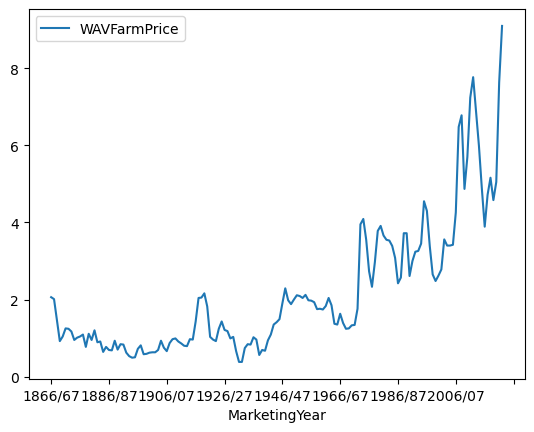

In [17]:
wheat_raw_df[wheat_raw_df['WheatType']=='All wheat'].plot(x='MarketingYear',y='WAVFarmPrice');

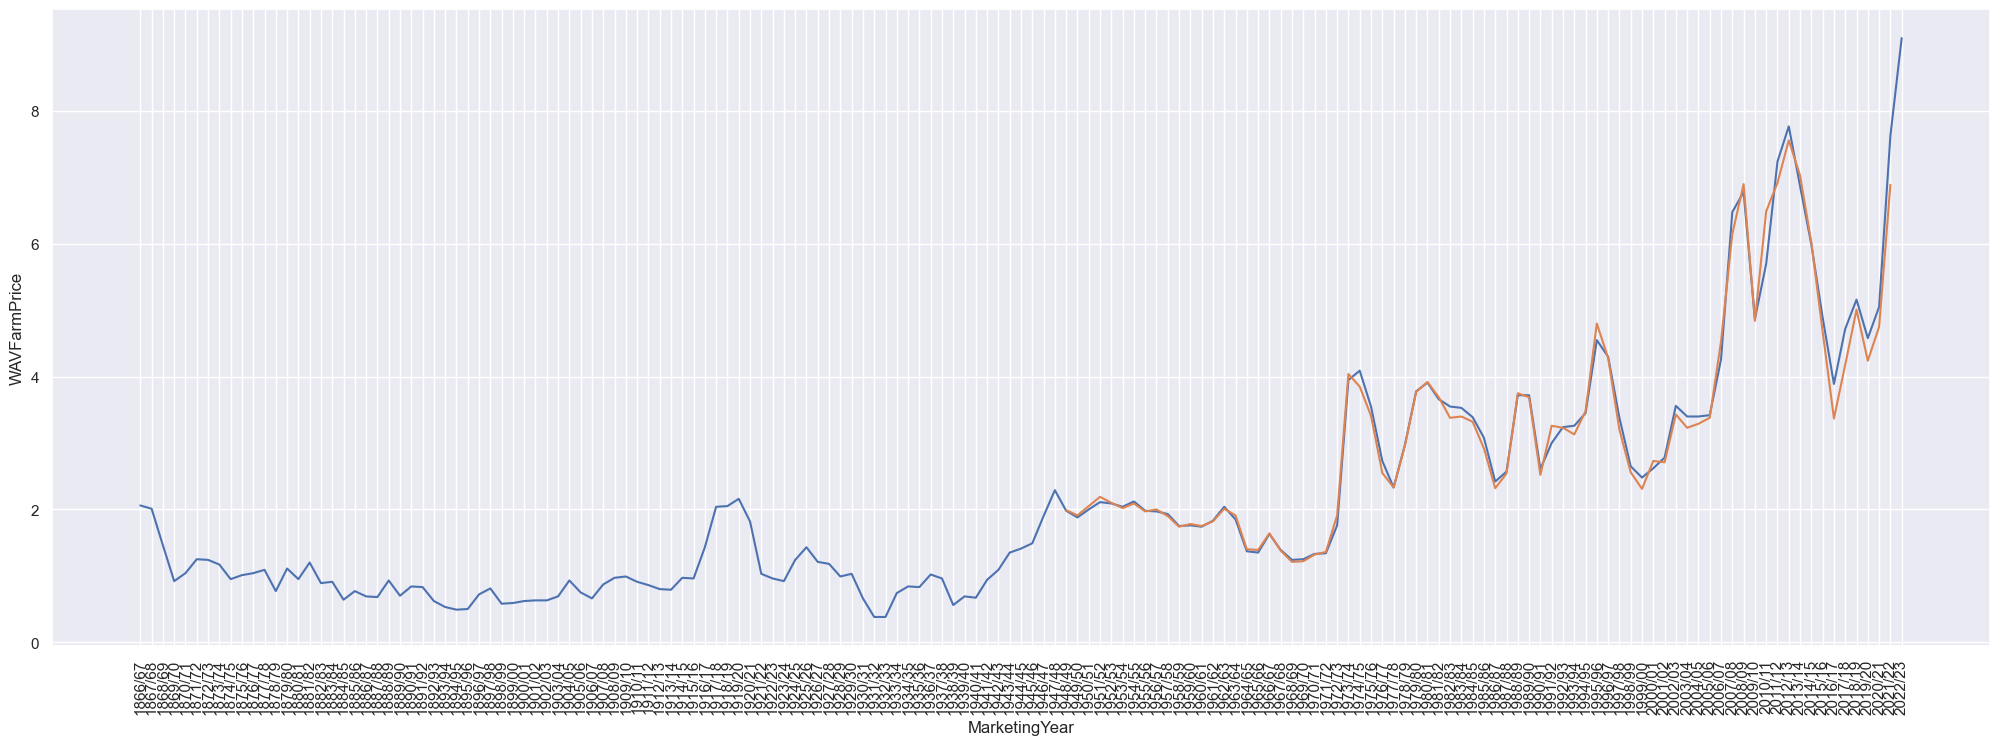

In [18]:
sns.set(rc={'figure.figsize':(25,8.27)})
all_wheat_df = wheat_raw_df[wheat_raw_df['WheatType']=='All wheat']
sns.lineplot(data=all_wheat_df, x='MarketingYear',y='WAVFarmPrice');


all_redwinterwheat_df = wheat_raw_df[wheat_raw_df['WheatType']=='Hard red winter']
sns.lineplot(data=all_redwinterwheat_df, x='MarketingYear',y='WAVFarmPrice');
plt.xticks(rotation=90);

In [19]:
wheat_raw_df = wheat_raw_df.dropna()
wheat_raw_df['Year'] = wheat_raw_df['MarketingYear'].apply(lambda x: int(x.split('/')[0]))

All wheat
Hard red winter
Hard red spring
Soft red winter
White
Durum


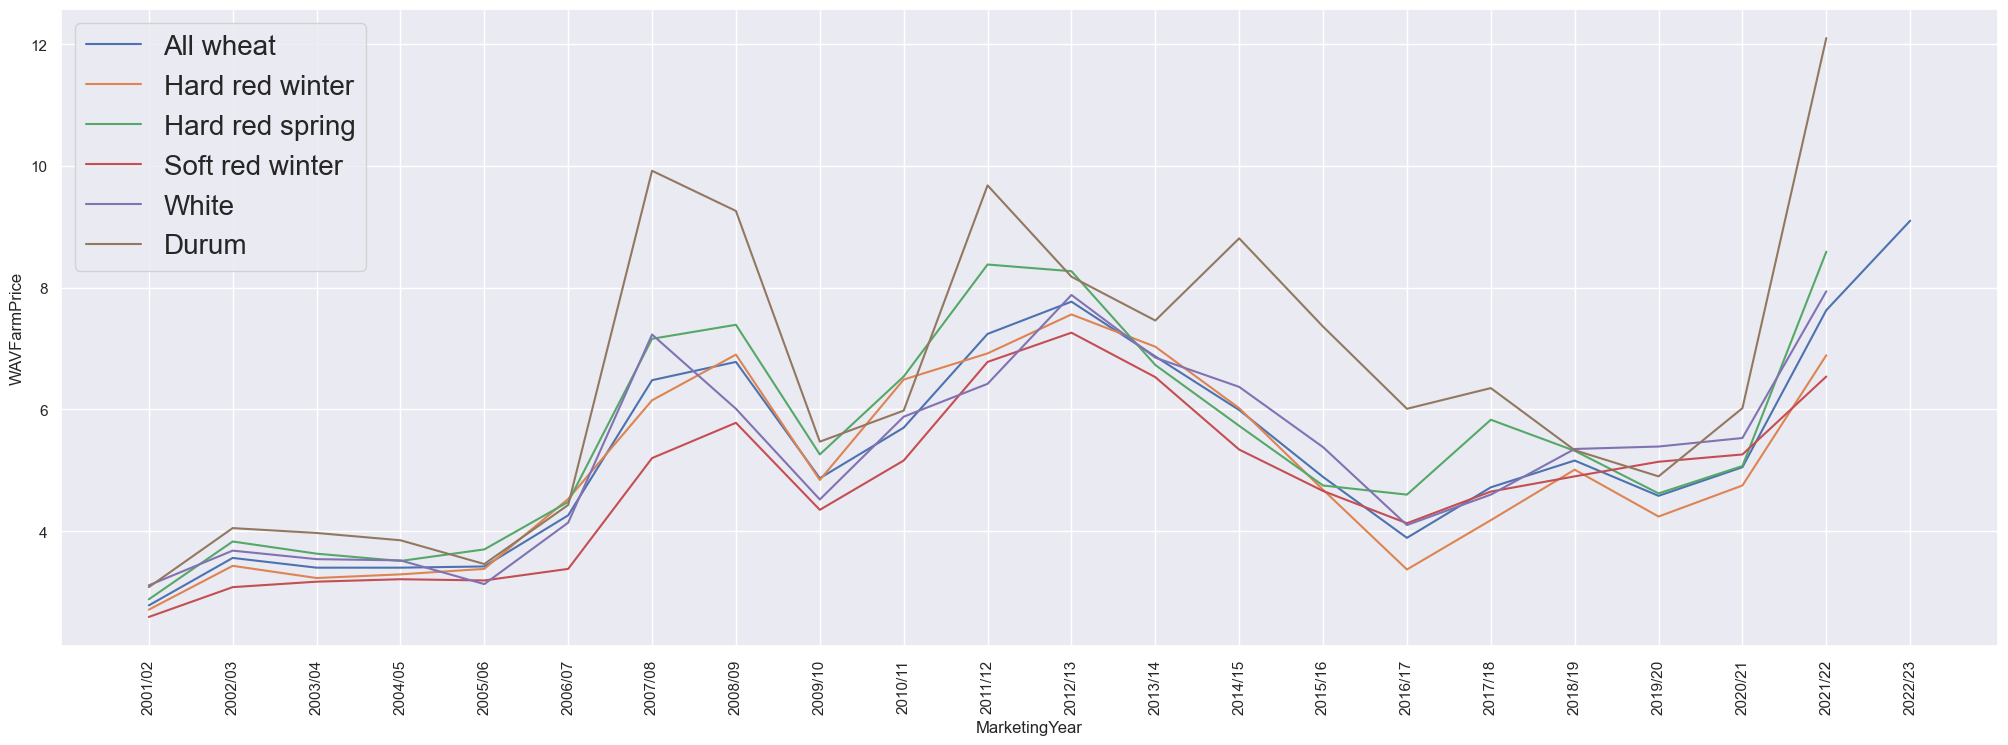

In [25]:
for wheatType in wheat_raw_df['WheatType'].dropna().unique():
    print(wheatType)
    sns.set(rc={'figure.figsize':(25,8.27)})
    all_wheat_df = wheat_raw_df[(wheat_raw_df['WheatType']==wheatType) & (wheat_raw_df['Year']>2000)]
    gpg = sns.lineplot(data=all_wheat_df, x='MarketingYear',y='WAVFarmPrice',label=wheatType);
    gpg.legend(fontsize=20)
    plt.xticks(rotation=90);

All wheat
Hard red winter
Hard red spring
Soft red winter
White
Durum


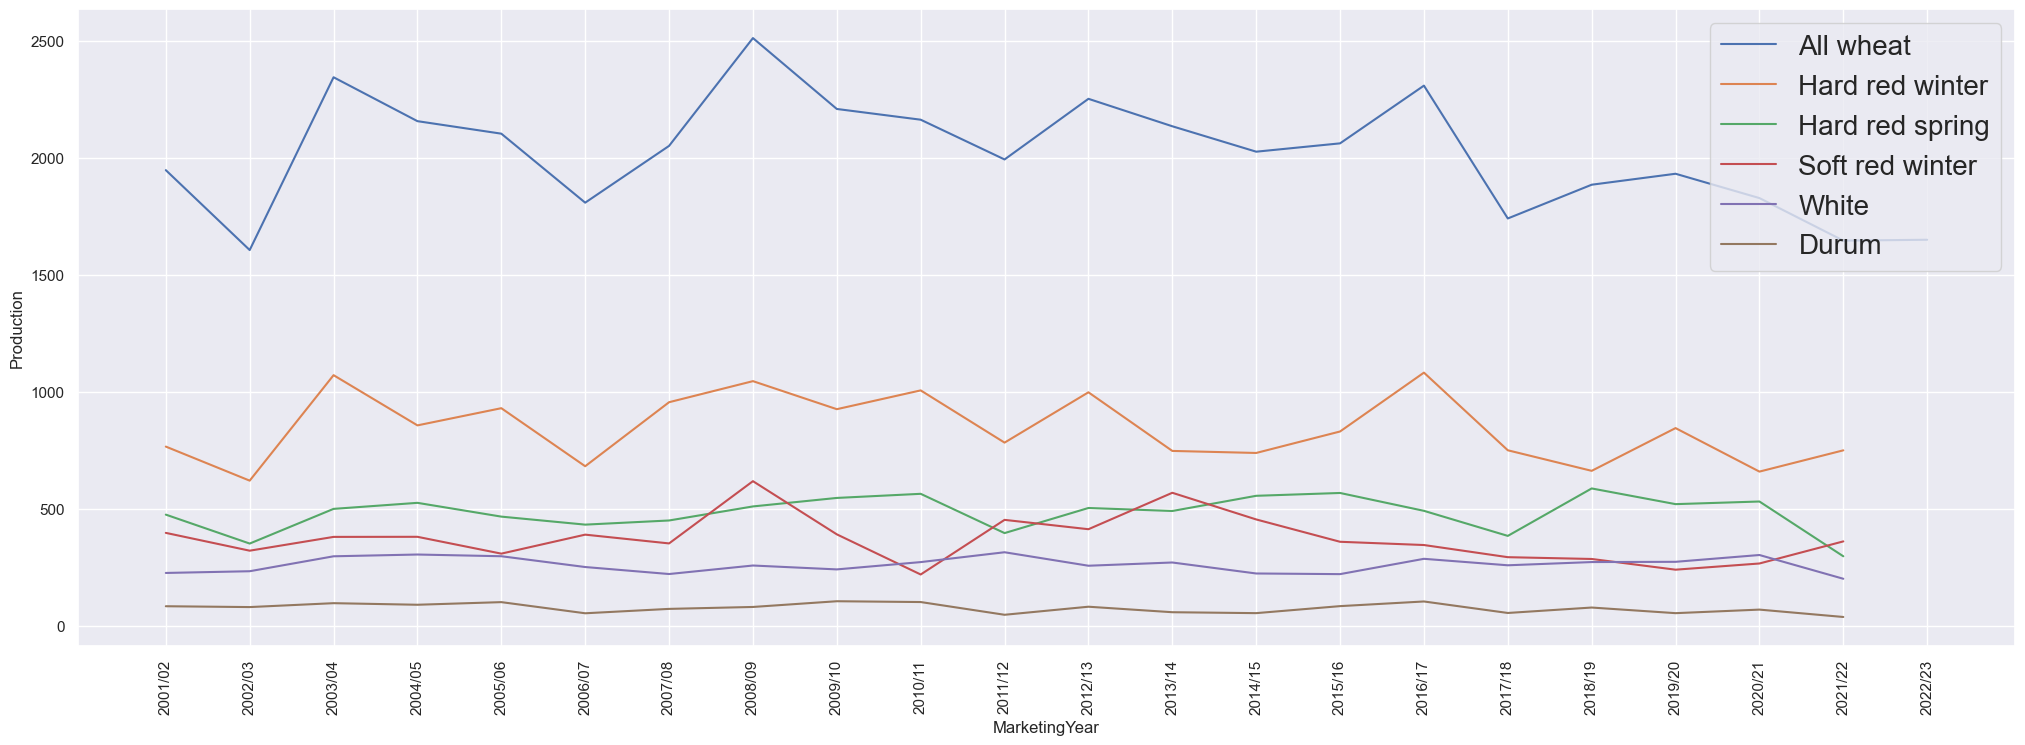

In [26]:
for wheatType in wheat_raw_df['WheatType'].dropna().unique():
    print(wheatType)
    sns.set(rc={'figure.figsize':(25,8.27)})
    all_wheat_df = wheat_raw_df[(wheat_raw_df['WheatType']==wheatType) & (wheat_raw_df['Year']>2000)]
    gpg = sns.lineplot(data=all_wheat_df, x='MarketingYear',y='Production',label=wheatType);
    gpg.legend(fontsize=20)
    plt.xticks(rotation=90);

In [28]:
#wheat_raw_df['HarvestedAcreage']
wheat_raw_df['HarvestedAcreage']  = wheat_raw_df['HarvestedAcreage'].apply(lambda x: np.nan if str(x) == '--' else x)

All wheat
Hard red winter
Hard red spring
Soft red winter
White
Durum


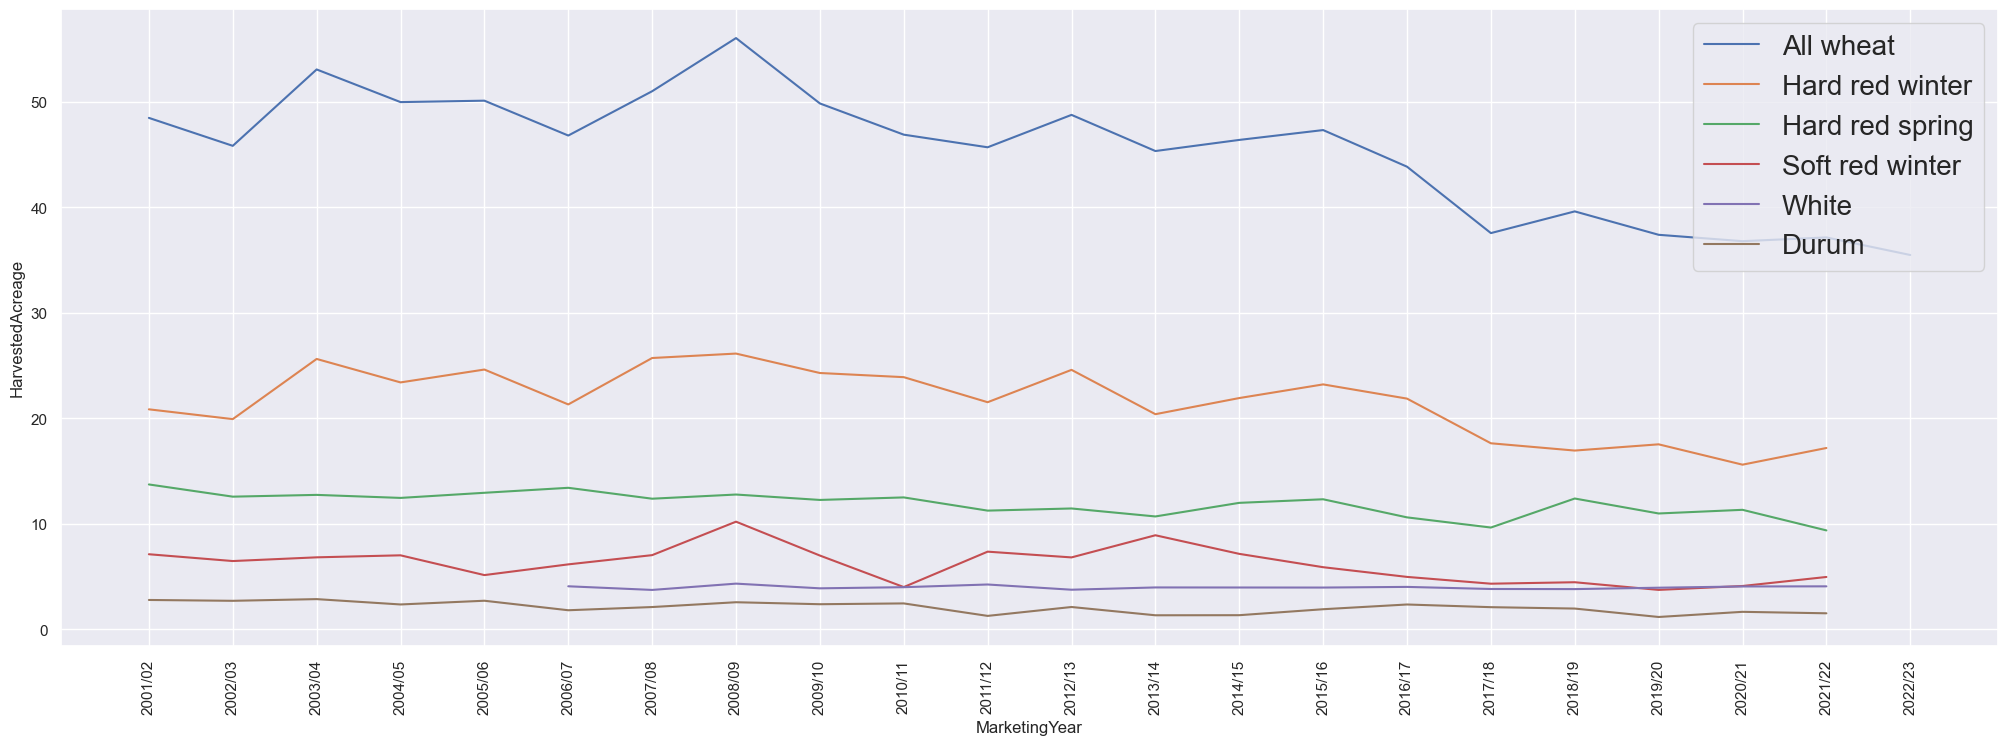

In [29]:

for wheatType in wheat_raw_df['WheatType'].dropna().unique():
    print(wheatType)
    sns.set(rc={'figure.figsize':(25,8.27)})
    all_wheat_df = wheat_raw_df[(wheat_raw_df['WheatType']==wheatType) & (wheat_raw_df['Year']>2000)]
    gpg = sns.lineplot(data=all_wheat_df, x='MarketingYear',y='HarvestedAcreage',label=wheatType);
    gpg.legend(fontsize=20)
    plt.xticks(rotation=90);

In [31]:
wheat_raw_df['Yield']  = wheat_raw_df['Yield'].apply(lambda x: np.nan if str(x) == '--' else x)

All wheat
Hard red winter
Hard red spring
Soft red winter
White
Durum


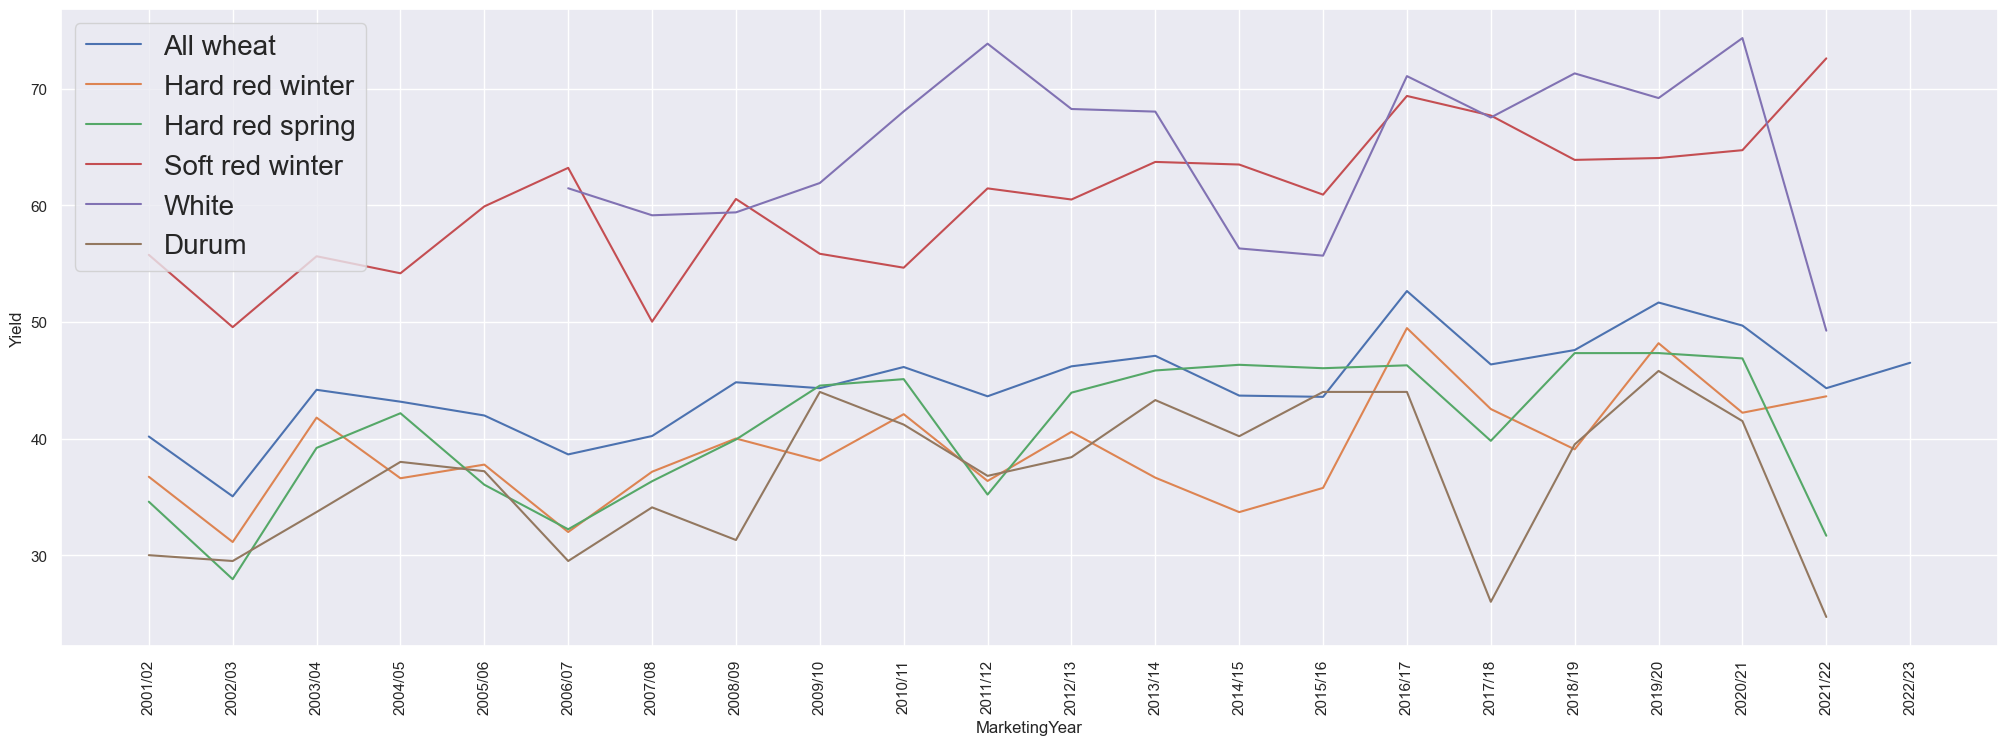

In [32]:
for wheatType in wheat_raw_df['WheatType'].dropna().unique():
    print(wheatType)
    sns.set(rc={'figure.figsize':(25,8.27)})
    all_wheat_df = wheat_raw_df[(wheat_raw_df['WheatType']==wheatType) & (wheat_raw_df['Year']>2000)]
    gpg = sns.lineplot(data=all_wheat_df, x='MarketingYear',y='Yield',label=wheatType);
    gpg.legend(fontsize=20)
    plt.xticks(rotation=90);